# NATURAL LANGUAGE PROCESSING

## TWITTER SENTIMENT ANALYSIS

**Importing necessary liabraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#%matplotlib.inline

In [3]:
import re
import string
import nltk
stopwords=nltk.corpus.stopwords.words("english")
pd.set_option("display.max_colwidth",100)

wn = nltk.WordNetLemmatizer()

**Reading dataset using pandas**

In [4]:
# training dataset
train_dataset=pd.read_csv("/users/akshay/desktop/Sentiment analysis/Twitter/train_tweets.csv") 
# testing dataset
test_dataset=pd.read_csv("/users/akshay/desktop/Sentiment analysis/Twitter/test_tweets.csv")

In [5]:
train_dataset.head() # first 5 rows of the dataset

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [6]:
test_dataset.head() # first 5 rows of the dataset

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs ...
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ð..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [7]:
## adding some new features to the training data set
# adding new column : tweet_length
# tweet _length shows the length of tweets

train_dataset["tweet_length"]=train_dataset["tweet"].apply(lambda x:len(x)-x.count(" "))

In [8]:
# adding new column : punct%
# punct% shows the percentage of punctuations used in the tweets

# function for calculating punctuation percentage in each tweet
def punct(text):
    count=sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100
train_dataset['punct%']=train_dataset["tweet"].apply(lambda x: punct(x))
train_dataset.head()

,id,label,tweet,tweet_length,punct%
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,82,3.7
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,101,7.9
2,3,0,bihday your majesty,17,0.0
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,70,5.7
4,5,0,factsguide: society now #motivation,32,6.2


**Exploring the Datasets**

In [9]:
# shape of the datasets
print("The training dataset has {} rows and {} columns".format (len(train_dataset),len(train_dataset.columns)))
print("The testing dataset has {} rows and {} columns".format (len(test_dataset),len(test_dataset.columns)))

The training dataset has 31962 rows and 5 columns
The testing dataset has 17197 rows and 2 columns


In [10]:
# No of Negative tweets and postive tweets in training dataset
print("Out of {} rows {} are negative tweets and {} are positive tweets".format(len(train_dataset),
                                                                                len(train_dataset[train_dataset["label"]==0])
                                                                                ,len(train_dataset[train_dataset["label"]==1])))

Out of 31962 rows 29720 are negative tweets and 2242 are positive tweets


In [11]:
# checking for missing data in the training data set
print("Number of null values in ID: {}  ".format(train_dataset["id"].isnull().sum()))
print("Number of null values in labels: {}  ".format(train_dataset["label"].isnull().sum()))
print("Number of null values in Tweets: {}  ".format(train_dataset["tweet"].isnull().sum()))

Number of null values in ID: 0  
Number of null values in labels: 0  
Number of null values in Tweets: 0  


In [12]:
# checking for the distribution of the length of tweets for negative and positive sentiments , i.e for labels 0 and 1

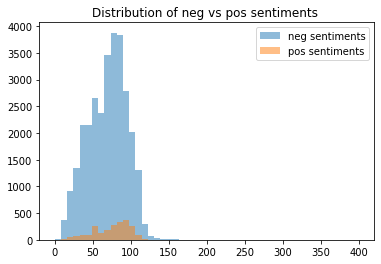

In [13]:
bins=np.linspace(0,400)
plt.hist(train_dataset[train_dataset["label"]==0]["tweet_length"],bins,alpha=0.5,label="neg sentiments")
plt.hist(train_dataset[train_dataset["label"]==1]["tweet_length"],bins,alpha=0.5,label="pos sentiments")
plt.title("Distribution of neg vs pos sentiments ")
plt.legend()
plt.show()

##### ----> Null hypothesis (H0) : length of the tweets for negative sentiments is less than or qual to length of tweets for positive sentiments
##### ----> Alternate hypothesis (H1) : length of the tweets for negative sentiments is greater than length of tweets for positive sentiments
**We can see that the length of the tweets for negative sentiments is greater than the length of tweets for positive sentiments,hence we reject null hypothesis**  

**Tokenization**

In [14]:
# function for converting raw tweets into tokenized tweets with no stopwords.

def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text
# adding new column tweet_nostopwords which consists of tokenized tweets with no stopwords.
train_dataset['tweet_nostopwords'] = train_dataset['tweet'].apply(lambda x: clean_text(x.lower()))

train_dataset.head()

,id,label,tweet,tweet_length,punct%,tweet_nostopwords
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,82,3.7,"[, user, father, dysfunctional, selfish, drags, kids, dysfunction, run]"
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,101,7.9,"[user, user, thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapoi..."
2,3,0,bihday your majesty,17,0.0,"[, bihday, majesty]"
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,70,5.7,"[model, love, u, take, u, time, urð, ð, ð, ð, ð, ð, ð, ð, ]"
4,5,0,factsguide: society now #motivation,32,6.2,"[, factsguide, society, motivation]"


**Lemmatization**

In [15]:
def lemmatizing(tokenized_text):
    text = " ".join([wn.lemmatize(word) for word in tokenized_text])
    return text

train_dataset['tweet_lemmatized'] = train_dataset['tweet_nostopwords'].apply(lambda x: lemmatizing(x))

train_dataset.head(10)

,id,label,tweet,tweet_length,punct%,tweet_nostopwords,tweet_lemmatized
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. ...,82,3.7,"[, user, father, dysfunctional, selfish, drags, kids, dysfunction, run]",user father dysfunctional selfish drag kid dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. ...,101,7.9,"[user, user, thanks, lyft, credit, cant, use, cause, dont, offer, wheelchair, vans, pdx, disapoi...",user user thanks lyft credit cant use cause dont offer wheelchair van pdx disapointed getthanked
2,3,0,bihday your majesty,17,0.0,"[, bihday, majesty]",bihday majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,70,5.7,"[model, love, u, take, u, time, urð, ð, ð, ð, ð, ð, ð, ð, ]",model love u take u time urð ð ð ð ð ð ð ð
4,5,0,factsguide: society now #motivation,32,6.2,"[, factsguide, society, motivation]",factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get ther...,96,6.2,"[22, huge, fan, fare, big, talking, leave, chaos, pay, disputes, get, allshowandnogo, ]",22 huge fan fare big talking leave chaos pay dispute get allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,63,12.7,"[, user, camping, tomorrow, user, user, user, user, user, user, user, dannyâ, ]",user camping tomorrow user user user user user user user dannyâ
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #ha...,121,7.4,"[next, school, year, year, examsð, cant, think, ð, school, exams, hate, imagine, actorslife, rev...",next school year year examsð cant think ð school exam hate imagine actorslife revolutionschool girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,75,14.7,"[love, land, allin, cavs, champions, cleveland, clevelandcavaliers, â, ]",love land allin cavs champion cleveland clevelandcavaliers â
9,10,0,@user @user welcome here ! i'm it's so #gr8 !,36,19.4,"[, user, user, welcome, im, gr8, ]",user user welcome im gr8


**Vectorization**

**1) Using Count Vectorizer**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
count_vect=CountVectorizer(analyzer=clean_text)
X_counts=count_vect.fit_transform(train_dataset["tweet_lemmatized"])
print(X_counts.shape)
#print(count_vect.get_feature_names())

(31962, 41317)


In [18]:
# in order to print the matrix we have to convert it to array
X_counts_df=pd.DataFrame(X_counts.toarray())
X_counts_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,41307,41308,41309,41310,41311,41312,41313,41314,41315,41316
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2) N grams vectorization**


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
countt_vect=CountVectorizer(ngram_range=(1,3),analyzer=clean_text)
xx_counts=(countt_vect.fit_transform (train_dataset["tweet_lemmatized"]))
print(xx_counts.shape)
#print(countt_vect.get_feature_names())

(31962, 41317)


In [20]:
# in order to print the matrix we have to convert it to array
xx_counts_df=pd.DataFrame(xx_counts.toarray())
xx_counts_df.columns=countt_vect.get_feature_names()
xx_counts_df.head(10)

,,0,0000001,00027,001,0035,00h30,01,0115,0161,...,ð¾ð½ð,ð¾ð½ðµð,ð¾ñ,ñ,ò,ó¾,ø,øª,ø¹ù,ù
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3) TF-IDF vectorization (trem frequency-inverse document vectorizer)**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer=clean_text,max_df=0.5,min_df=2)
x_tfidf=tfidf.fit_transform(train_dataset["tweet_lemmatized"])
print(x_tfidf.shape)
#print(tfidf.get_feature_names())

(31962, 14319)


In [26]:
# in order to print the matrix we have to convert it to array
x_tfidf_df=pd.DataFrame(x_tfidf.toarray())
#x_tfidf_df.columns=tfidf.get_feature_names()
x_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,14309,14310,14311,14312,14313,14314,14315,14316,14317,14318
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
